## Part-1

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

In [28]:
df_train = pd.read_csv("trainRegression.csv")
df_test = pd.read_csv("testRegression.csv")

In [29]:
df_train.head()

,X,R
0,0.01,-0.2730
1,0.02,-0.1170
2,0.03,-0.3090
3,0.04,0.0306
4,0.05,-0.0802


In [30]:
df_train.X

0      0.01
1      0.02
2      0.03
3      0.04
4      0.05
       ... 
278    3.09
279    3.11
280    3.12
281    3.13
282    3.14
Name: X, Length: 283, dtype: float64

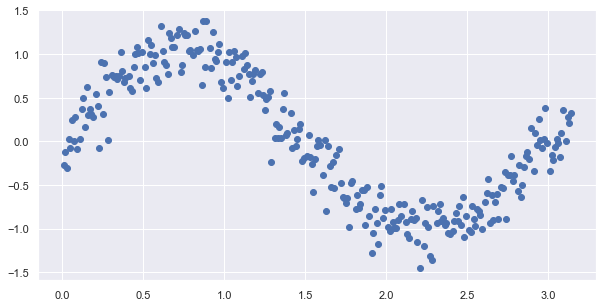

In [31]:
plt.figure(figsize=(10,5))
plt.plot(df_train.X,df_train.R,'bo');

In [32]:
type(df_train)

pandas.core.frame.DataFrame

In [33]:
train_data = df_train.to_numpy()
test_data = df_test.to_numpy()
type(train_data)

numpy.ndarray

In [34]:
#numpydata[:,1]

In [35]:
x = train_data[:,0]
y = train_data[:,1]

x_test = test_data[:,0]
y_test = test_data[:,1]

In [36]:
#np.c_[x, np.zeros(x.shape[0])].shape

## Part-2 ( Training )

In [37]:
### X variables
m = x.shape[0]
x1 = x.sum()
x2 = np.sum(x**2)
x3 = np.sum(x**3)
x4 = np.sum(x**4)
x5 = np.sum(x**5)
x6 = np.sum(x**6)
x7 = np.sum(x**7)
x8 = np.sum(x**8)
x9 = np.sum(x**9)
x10 = np.sum(x**10)
x11 = np.sum(x**11)
x12 = np.sum(x**12)

In [38]:
### Y variable
y1 = y.sum()
yx = np.sum(np.multiply(x,y))
yx2 = np.sum(np.multiply((x**2),y))
yx3 = np.sum(np.multiply((x**3),y))
yx4 = np.sum(np.multiply((x**4),y))
yx5 = np.sum(np.multiply((x**5),y))
yx6 = np.sum(np.multiply((x**6),y))

In [103]:
# MSE calculation function
def MSE(y_true,y_pred):
    m = y_true.shape[0]
    return (1/(2*m)) * (np.sum(((y_true-y_pred)**2)))

## Linear

In [40]:
A = np.array([[m,x1],
              [x1,x2]])

In [41]:
B = np.array([[y1],
              [yx]])

In [42]:
B

array([[   1.39087  ],
       [-126.6414295]])

In [43]:
#A_inv = np.linalg.solve(A,B)

In [44]:
A_inv = np.linalg.inv(A)
linear_theta=np.dot(A_inv,B)

In [45]:
linear_theta

array([[ 0.8736061 ],
       [-0.55251074]])

In [46]:
# By Linear equation
y_linear = linear_theta[0] + linear_theta[1]*x

In [47]:
# By matrix multiplication
ones=np.ones(x.shape[0])
x_mul = np.c_[ones,x]
y_linear = np.dot(x_mul,linear_theta)

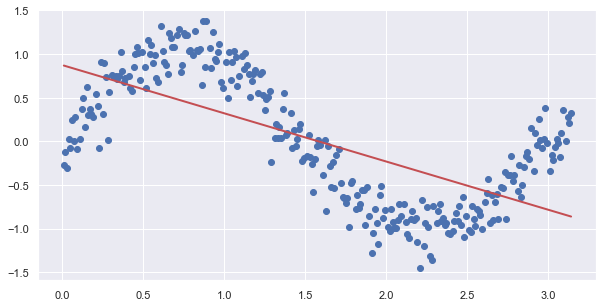

In [48]:
plt.figure(figsize=(10,5))
plt.plot(x,y,'bo');
plt.plot(x,y_linear,'r',linewidth=2)
plt.show()

#### MSE

In [49]:
linear_mse = MSE(y,y_linear[:,0])
print(linear_mse)

0.14953637691472502


## Quadratic

In [50]:
A = np.array([[m,x1,x2],
              [x1,x2,x3],
              [x2,x3,x4]])

In [51]:
B = np.array([[y1],
              [yx],
              [yx2]])

In [52]:
B

array([[   1.39087   ],
       [-126.6414295 ],
       [-378.87568955]])

In [53]:
A_inv = np.linalg.inv(A)

In [54]:
quadratic_theta = np.dot(A_inv,B)

In [55]:
quadratic_theta

array([[ 1.10611454],
       [-0.99606599],
       [ 0.14104585]])

In [56]:
# By quadratic equation
y_quadratic = quadratic_theta[0] + quadratic_theta[1]*x + (quadratic_theta[2]*(x**2))

In [57]:
# By matrix multiplication
ones=np.ones(x.shape[0])
square=np.array(x**2)
x_mul = np.c_[ones,x,square]
y_quadratic = np.dot(x_mul,quadratic_theta)

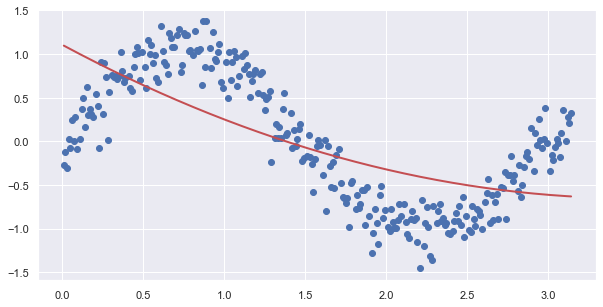

In [58]:
plt.figure(figsize=(10,5))
plt.plot(x,y,'bo');
plt.plot(x,y_quadratic,'r',linewidth=2)
plt.show()

#### MSE

In [59]:
quadratic_mse = MSE(y,y_quadratic[:,0])
print(quadratic_mse)

0.14413528518661506


## Cubic

In [60]:
A = np.array([[m,x1,x2,x3],
              [x1,x2,x3,x4],
              [x2,x3,x4,x5],
              [x3,x4,x5,x6]])

In [61]:
B = np.array([[y1],
              [yx],
              [yx2],
              [yx3]])

In [62]:
A_inv = np.linalg.inv(A)

In [63]:
cubic_theta = np.dot(A_inv,B)

In [64]:
cubic_theta

array([[-0.18862637],
       [ 3.94071895],
       [-3.78251095],
       [ 0.83166145]])

In [65]:
y_cubic = cubic_theta[0] + cubic_theta[1]*x + (cubic_theta[2]*(x**2)) + (cubic_theta[3]*(x**3))

In [66]:
# By matrix multiplication
ones=np.ones(x.shape[0])
square=np.array(x**2)
cube=np.array(x**3)
x_mul = np.c_[ones,x,square,cube]
y_cubic = np.dot(x_mul,cubic_theta)

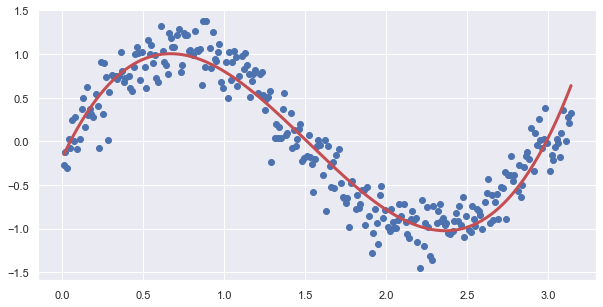

In [67]:
plt.figure(figsize=(10,5))
plt.plot(x,y,'bo');
plt.plot(x,y_cubic,'r',linewidth=3)
plt.show()

#### MSE

In [68]:
cubic_mse = MSE(y,y_cubic[:,0])
print(cubic_mse)

0.024830127681107792


## Fourth degree

In [69]:
A = np.array([[m,x1,x2,x3,x4],
              [x1,x2,x3,x4,x5],
              [x2,x3,x4,x5,x6],
              [x3,x4,x5,x6,x7],
              [x4,x5,x6,x7,x8]])

In [70]:
B = np.array([[y1],
              [yx],
              [yx2],
              [yx3],
              [yx4]])

In [71]:
A_inv = np.linalg.inv(A)

In [72]:
four_theta =np.dot(A_inv,B)

In [73]:
four_theta

array([[-0.40789474],
       [ 5.3320982 ],
       [-5.77179206],
       [ 1.81519401],
       [-0.15632916]])

In [74]:
y_four = four_theta[0] + four_theta[1]*x + (four_theta[2]*(x**2)) + (four_theta[3]*(x**3)) + (four_theta[4]*(x**4))

In [75]:
# By matrix multiplication
ones=np.ones(x.shape[0])
square=np.array(x**2)
cube=np.array(x**3)
four=np.array(x**4)
x_mul = np.c_[ones,x,square,cube,four]
y_four = np.dot(x_mul,four_theta)

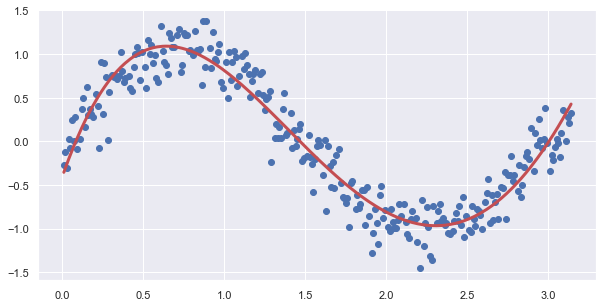

In [76]:
plt.figure(figsize=(10,5))
plt.plot(x,y,'bo');
plt.plot(x,y_four,'r',linewidth=3)
plt.show()

#### MSE

In [77]:
four_mse = MSE(y,y_four[:,0])
print(four_mse)

0.02218581826272672


## Fifth degree

In [78]:
A = np.array([[m,x1,x2,x3,x4,x5],
              [x1,x2,x3,x4,x5,x6],
              [x2,x3,x4,x5,x6,x7],
              [x3,x4,x5,x6,x7,x8],
              [x4,x5,x6,x7,x8,x9],
              [x5,x6,x7,x8,x9,x10]])

In [79]:
B = np.array([[y1],
              [yx],
              [yx2],
              [yx3],
              [yx4],
              [yx5]])

In [80]:
A_inv = np.linalg.inv(A)

In [81]:
five_theta =np.dot(A_inv,B)

In [82]:
five_theta

array([[-0.15135453],
       [ 2.89713972],
       [-0.36242335],
       [-2.76674175],
       [ 1.48161173],
       [-0.20822932]])

In [83]:
y_five = five_theta[0] + five_theta[1]*x + (five_theta[2]*(x**2)) + (five_theta[3]*(x**3)) + (five_theta[4]*(x**4)) + (five_theta[5]*(x**5))

In [84]:
# By matrix multiplication
ones=np.ones(x.shape[0])
square=np.array(x**2)
cube=np.array(x**3)
four=np.array(x**4)
five=np.array(x**5)
x_mul = np.c_[ones,x,square,cube,four,five]
y_five = np.dot(x_mul,five_theta)

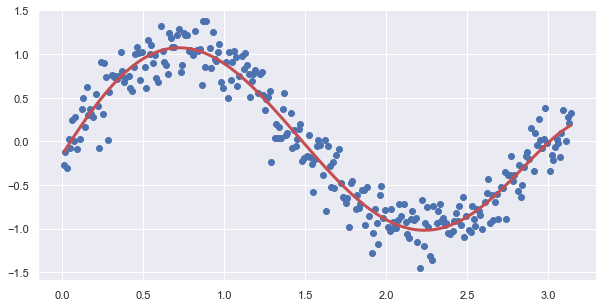

In [85]:
plt.figure(figsize=(10,5))
plt.plot(x,y,'bo');
plt.plot(x,y_five,'r',linewidth=3)
plt.show()

#### MSE

In [86]:
five_mse = MSE(y,y_five[:,0])
print(five_mse)

0.01926077869999148


## Sixth degree

In [87]:
A = np.array([[m,x1,x2,x3,x4,x5,x6],
              [x1,x2,x3,x4,x5,x6,x7],
              [x2,x3,x4,x5,x6,x7,x8],
              [x3,x4,x5,x6,x7,x8,x9],
              [x4,x5,x6,x7,x8,x9,x10],
              [x5,x6,x7,x8,x9,x10,x11],
              [x6,x7,x8,x9,x10,x11,x12]])

In [88]:
B = np.array([[y1],
              [yx],
              [yx2],
              [yx3],
              [yx4],
              [yx5],
              [yx6]])

In [89]:
A_inv = np.linalg.inv(A)

In [90]:
six_theta =np.dot(A_inv,B)

In [91]:
six_theta

array([[-0.12883598],
       [ 2.59932802],
       [ 0.58098511],
       [-3.96416677],
       [ 2.19455082],
       [-0.40752775],
       [ 0.02110818]])

In [92]:
y_six = six_theta[0] + six_theta[1]*x + (six_theta[2]*(x**2)) + (six_theta[3]*(x**3)) + (six_theta[4]*(x**4)) + (six_theta[5]*(x**5)) + (six_theta[6]*(x**6))

In [93]:
# By matrix multiplication
ones=np.ones(x.shape[0])
square=np.array(x**2)
cube=np.array(x**3)
four=np.array(x**4)
five=np.array(x**5)
six=np.array(x**6)
x_mul = np.c_[ones,x,square,cube,four,five,six]
y_six = np.dot(x_mul,six_theta)

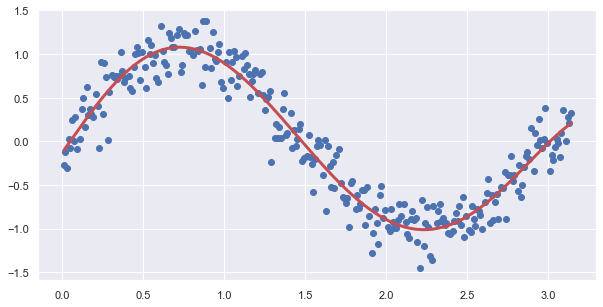

In [94]:
plt.figure(figsize=(10,5))
plt.plot(x,y,'bo');
plt.plot(x,y_six,'r',linewidth=3)
plt.show()

#### MSE

In [95]:
six_mse = MSE(y,y_six[:,0])
print(six_mse)

0.0192421054529107


# Result

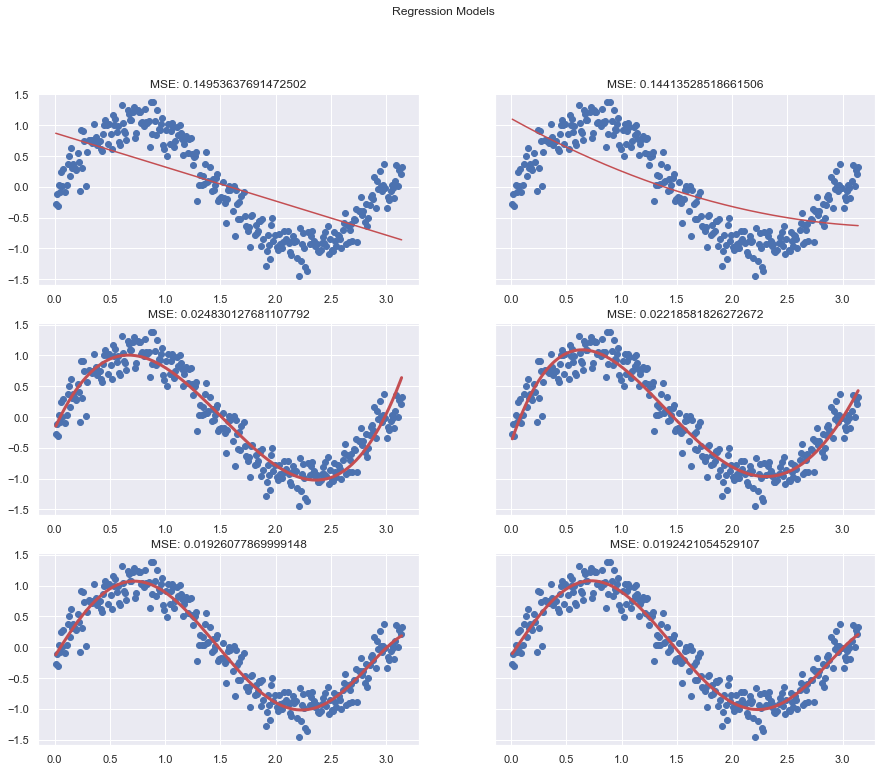

In [96]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 12),sharey=True)
fig.suptitle('Regression Models')

ax1.plot(x,y,'bo');
ax1.plot(x,y_linear,'r');
ax1.title.set_text('MSE: '+ str(linear_mse))

ax2.plot(x,y,'bo');
ax2.plot(x,y_quadratic,'r');
ax2.title.set_text('MSE: ' + str(quadratic_mse))

ax3.plot(x,y,'bo');
ax3.plot(x,y_cubic,'r',linewidth=3);
ax3.title.set_text('MSE: ' +  str(cubic_mse))

ax4.plot(x,y,'bo');
ax4.plot(x,y_four,'r',linewidth=3);
ax4.title.set_text('MSE: ' + str(four_mse))

ax5.plot(x,y,'bo');
ax5.plot(x,y_five,'r',linewidth=3);
ax5.title.set_text('MSE: ' + str(five_mse))

ax6.plot(x,y,'bo');
ax6.plot(x,y_six,'r',linewidth=3);
ax6.title.set_text('MSE: ' + str(six_mse))

## Testing

In [97]:
x_test

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1])

In [98]:
y_test

array([-0.226 , -0.174 ,  0.459 ,  0.638 ,  0.869 ,  0.665 ,  0.745 ,
        1.25  ,  0.929 ,  0.946 ,  1.01  ,  0.928 ,  0.586 ,  0.704 ,
       -0.0383, -0.156 , -0.339 , -0.0542, -0.628 , -0.985 , -0.595 ,
       -0.698 , -1.17  , -1.18  , -0.982 , -1.14  , -0.605 , -0.85  ,
       -0.404 ,  0.0864, -0.464 ,  0.142 ])

In [99]:
y_linear_test = linear_theta[0] + linear_theta[1]*x_test
y_quadratic_test = quadratic_theta[0] + quadratic_theta[1]*x_test + (quadratic_theta[2]*(x_test**2))
y_cubic_test = cubic_theta[0] + cubic_theta[1]*x_test + (cubic_theta[2]*(x_test**2)) + (cubic_theta[3]*(x_test**3))
y_four_test = four_theta[0] + four_theta[1]*x_test + (four_theta[2]*(x_test**2)) + (four_theta[3]*(x_test**3)) + (four_theta[4]*(x_test**4))
y_five_test = five_theta[0] + five_theta[1]*x_test + (five_theta[2]*(x_test**2)) + (five_theta[3]*(x_test**3)) + (five_theta[4]*(x_test**4)) + (five_theta[5]*(x_test**5))
y_six_test = six_theta[0] + six_theta[1]*x_test + (six_theta[2]*(x_test**2)) + (six_theta[3]*(x_test**3)) + (six_theta[4]*(x_test**4)) + (six_theta[5]*(x_test**5)) + (six_theta[6]*(x_test**6))

In [100]:
# By matrix multiplication
ones=np.ones(x_test.shape[0])
square=np.array(x_test**2)
cube=np.array(x_test**3)
four=np.array(x_test**4)
five=np.array(x_test**5)
six=np.array(x_test**6)

x_mul = np.c_[ones,x_test]
y_linear_test = np.dot(x_mul,linear_theta)

x_mul = np.c_[ones,x_test,square]
y_quadratic_test = np.dot(x_mul,quadratic_theta)

x_mul = np.c_[ones,x_test,square,cube]
y_cubic_test = np.dot(x_mul,cubic_theta)

x_mul = np.c_[ones,x_test,square,cube,four]
y_four_test = np.dot(x_mul,four_theta)

x_mul = np.c_[ones,x_test,square,cube,four,five]
y_five_test = np.dot(x_mul,five_theta)

x_mul = np.c_[ones,x_test,square,cube,four,five,six]
y_six_test = np.dot(x_mul,six_theta)

In [104]:
linear_mse_test = MSE(y_test,y_linear_test[:,0])
print("linear test MSE: ", linear_mse_test)

quadratic_mse_test = MSE(y_test,y_quadratic_test[:,0])
print("quadratic test MSE: ", quadratic_mse_test)

cubic_mse_test = MSE(y_test,y_cubic_test[:,0])
print("cubic test MSE: ", cubic_mse_test)

four_mse_test = MSE(y_test,y_four_test[:,0])
print("fourth degree test MSE: ", four_mse_test)

five_mse_test = MSE(y_test,y_five_test[:,0])
print("fifth degree test MSE: ", five_mse_test)

six_mse_test = MSE(y_test,y_six_test[:,0])
print("sixth degree test MSE: ", six_mse_test)

linear test MSE:  0.15796608602298873
quadratic test MSE:  0.16302089797481417
cubic test MSE:  0.02577102884547708
fourth degree test MSE:  0.025012609208176415
fifth degree test MSE:  0.022103387134261177
sixth degree test MSE:  0.02225433792002604


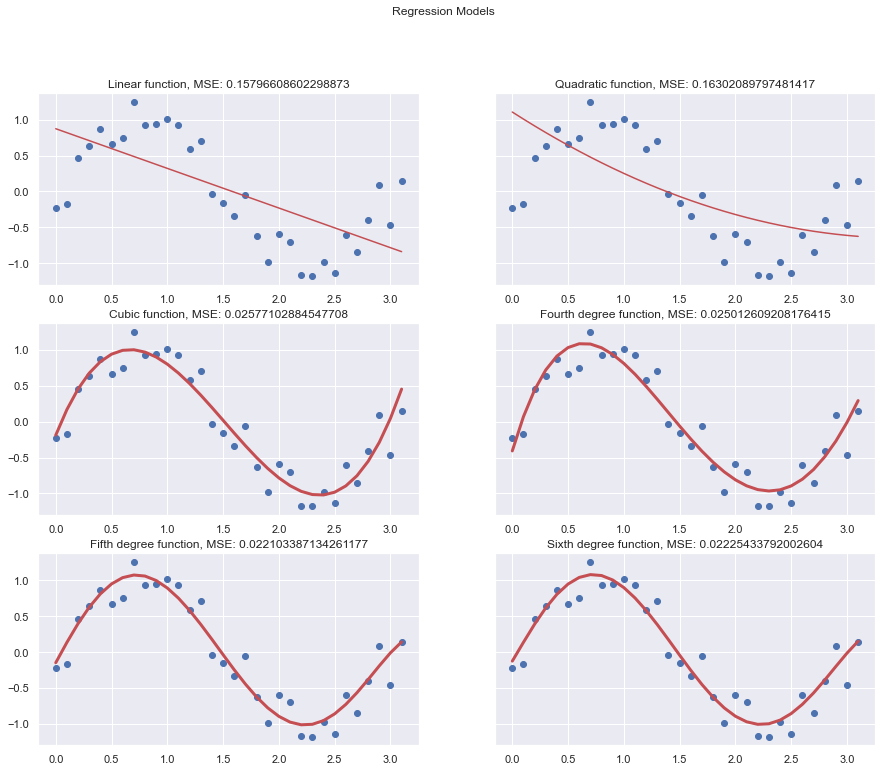

In [102]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 12),sharey=True)
fig.suptitle('Regression Models')

ax1.plot(x_test,y_test,'bo');
ax1.plot(x_test,y_linear_test,'r');
ax1.title.set_text('Linear function, MSE: '+ str(linear_mse_test))

ax2.plot(x_test,y_test,'bo');
ax2.plot(x_test,y_quadratic_test,'r');
ax2.title.set_text('Quadratic function, MSE: ' + str(quadratic_mse_test))

ax3.plot(x_test,y_test,'bo');
ax3.plot(x_test,y_cubic_test,'r',linewidth=3);
ax3.title.set_text('Cubic function, MSE: ' +  str(cubic_mse_test))

ax4.plot(x_test,y_test,'bo');
ax4.plot(x_test,y_four_test,'r',linewidth=3);
ax4.title.set_text('Fourth degree function, MSE: ' + str(four_mse_test))

ax5.plot(x_test,y_test,'bo');
ax5.plot(x_test,y_five_test,'r',linewidth=3);
ax5.title.set_text('Fifth degree function, MSE: ' + str(five_mse_test))

ax6.plot(x_test,y_test,'bo');
ax6.plot(x_test,y_six_test,'r',linewidth=3);
ax6.title.set_text('Sixth degree function, MSE: ' + str(six_mse_test))

# Comments

If we look at the data closely, it appears to be a Sine curve and a single straight line (y = mx + c) is too simple to predict a complex data like this. So, we start taking our model to a higher degree to make it understand complex pattern. 
As we can see, even a quadratic functon is quite simple for a complex data like this and it is unable to recognize the pattern of data properly.

When we use cubic function, it is observable that now our model is predicting pretty close to our actual data and it is starting to make some sense of the data, but we can say that it might be underfitting right now and it is capable of predicting even better then this. 

So, we use fourth degree function on it. As we can see that it's predictions look similar to cubic function but it's mean squared error is less then the cubic function. Hence, we trained it upto sixth degree function and our predictions are looking pretty good on our training data.

Further, to evaluate the performance of the model, test data was used and MSE was calculated for all models, as listed below:

- Linear test MSE:  0.15796608602298873
- Quadratic test MSE:  0.16302089797481417
- Cubic test MSE:  0.025771028845477096
- Fourth degree test MSE:  0.025012609208176426
- Fifth degree test MSE:  0.022103387134261306
- Sixth degree test MSE:  0.02225433792002586

It is evident that our model has minimum mean square error for the fifth degree model but on our training dataset the sixth degree model has the minimum mean square error. So, we can infer from these results that our sixth degree model has overfit the data and the best model to use for our predictions is the fifth degree model.